 Decision Trees Model

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and a decision tree classifier.

In [1]:
from sklearn import datasets
import pandas as pd

# load the wine dataset
wine = datasets.load_wine()
print(wine.DESCR)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']
# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [2]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
X.shape

(130, 13)

In [5]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
#import seaborn as sns
#sns.pairplot(X)

###  Partition the data into 70% training and 30% validation set.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [8]:
X_train.shape

(91, 13)

In [9]:
X_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
X_test.shape

(39, 13)

Fit a decision tree classifier on the training set with no pruning.



In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict (X_test)
print('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.9230769230769231


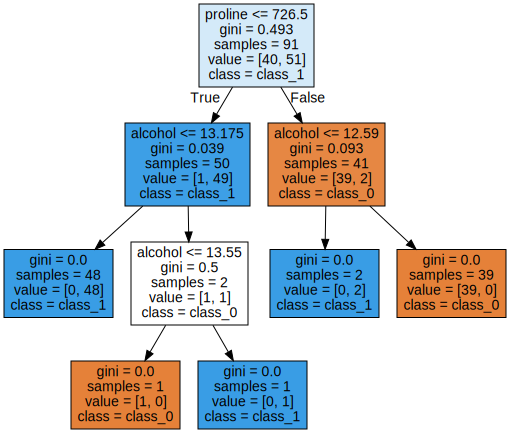

In [12]:
import graphviz
feature_name = wine['feature_names']
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_name, class_names=wine['target_names'],filled=True)
graph = graphviz.Source(dot_data)
graph

Prune the tree with cost complexity.

In [13]:
from sklearn.tree import DecisionTreeClassifier
ccp = model.cost_complexity_pruning_path(X_train, y_train)
alpha_value = ccp.ccp_alphas

In [14]:
ccp

{'ccp_alphas': array([0.        , 0.01076923, 0.04181185, 0.42934381]),
 'impurities': array([0.        , 0.02153846, 0.06335031, 0.49269412])}

In [15]:
#We create an array (alpha_array) to store different alpha values and calculate the accuracy of each pruned tree on the validation set to determine the best possible solution
alpha_array = [DecisionTreeClassifier(random_state=0,ccp_alpha=i).fit(X_train, y_train) for i in alpha_value]

In [16]:
alpha_array

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.010769230769230772, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.04181184668989547, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.4293438108393884, random_state=0)]

In [17]:
alpha_value

array([0.        , 0.01076923, 0.04181185, 0.42934381])

In [18]:
#Finding out the tree count for the all the element in the array
for i in range(len(alpha_array)):
  print(f'For the element {i} the tree count is: {alpha_array[i].tree_.node_count}')


For the element 0 the tree count is: 9
For the element 1 the tree count is: 5
For the element 2 the tree count is: 3
For the element 3 the tree count is: 1


Since for the last element the tree count is 1 we cannot consider ccp_alpha=0.41

In [19]:
import numpy as np
accuracy_rate = [model.score(X_train, y_train) for i in alpha_array]
best_alpha = alpha_value[np.argmax(accuracy_rate)]

In [20]:
accuracy_rate

[1.0, 1.0, 1.0, 1.0]

In [21]:
best_alpha

0.0

We can see the alpha_array value is high since the tree node count is more

best alpha is shown as 0 since alpha=0 has more accuracy rate because number of nodes is more. So we must take another alpha.

To prove this graphically we use subplots and decide the right alpha value which gives us high accuracy value.

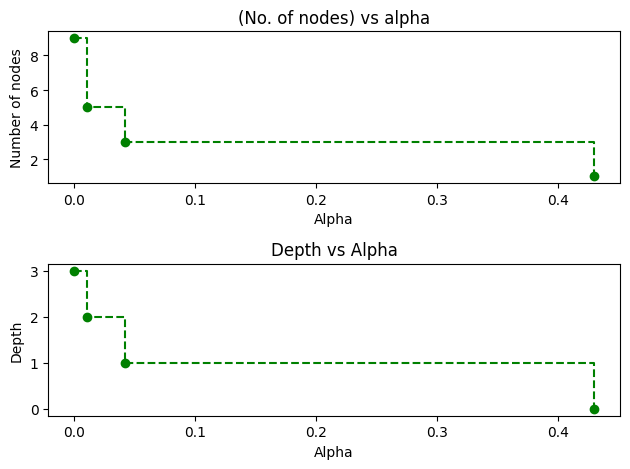

In [22]:
import matplotlib.pyplot as plt
node_counts = [i.tree_.node_count for i in alpha_array]
depth = [i.tree_.max_depth for i in alpha_array]
fig, ax = plt.subplots(2, 1)
ax[0].plot(alpha_value, node_counts,color ='g', marker="o", linestyle='dashed',drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("(No. of nodes) vs alpha")
ax[1].plot(alpha_value, depth, color ='g',marker="o",linestyle='dashed', drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

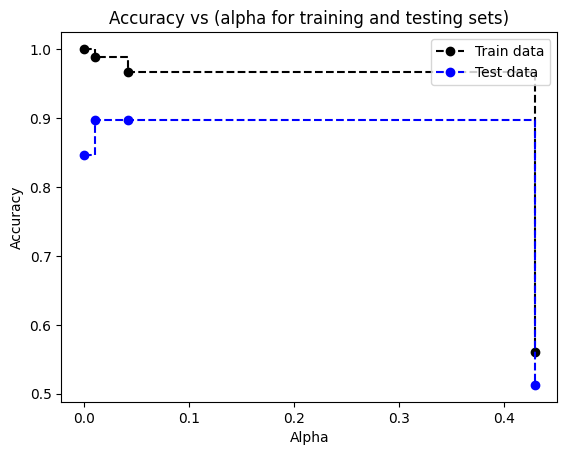

In [23]:
train_scores = [i.score(X_train, y_train) for i in alpha_array]
test_scores = [i.score(X_test, y_test) for i in alpha_array]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs (alpha for training and testing sets)")
ax.plot(alpha_value, train_scores, color = 'k',marker="o", linestyle='dashed',label="Train data", drawstyle="steps-post")
ax.plot(alpha_value, test_scores, color= 'b',marker="o", linestyle='dashed',label="Test data", drawstyle="steps-post")
ax.legend()
plt.show()

Taking the value 0.02 as the alpha value since the accuracy remains high approximately 95%

In [24]:
best = DecisionTreeClassifier(random_state=42,ccp_alpha=0.02).fit(X_train, y_train)

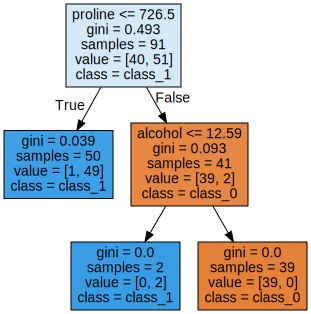

In [25]:
dot_data = tree.export_graphviz(best, out_file=None, feature_names=feature_name,filled=True, class_names=wine['target_names'])
graph = graphviz.Source(dot_data)
graph